In [3]:
import numpy as np
import pandas as pd
import tushare as ts
import matplotlib.pyplot as plt

In [14]:
# 从tushare获取数据

start = "2009-01-01"
end = "2019-01-01"
symbols = ["000001", "000002", "000651", "600519"]
df_dict = dict()
for symbol in symbols:
    df = ts.get_k_data(symbol, start=start, end=end)
    df.set_index("date", inplace=True)
    df_dict[symbol] = df
    
price = pd.DataFrame({symbol: df["close"] for symbol, df in df_dict.items()})
price.fillna(method="ffill", inplace=True)
price

,000001,000002,000651,600519
2009-01-05,3.227,5.178,2.954,68.615
2009-01-06,3.423,5.333,2.868,68.824
2009-01-07,3.320,5.302,2.834,67.609
2009-01-08,3.190,5.333,2.816,68.710
2009-01-09,3.273,5.325,2.878,67.925
2009-01-12,3.277,5.263,2.889,67.052
2009-01-13,3.147,5.078,2.886,64.488
2009-01-14,3.390,5.325,2.892,64.576
2009-01-15,3.423,5.294,2.892,63.291
2009-01-16,3.529,5.348,2.955,64.266


In [15]:
price.iloc[0]

000001     3.227
000002     5.178
000651     2.954
600519    68.615
Name: 2009-01-05, dtype: float64

In [17]:
# 标准化数据
first = price.iloc[0]
normalize_price = price / first * 100
normalize_price.head()

,000001,000002,000651,600519
2009-01-05,100.000000,100.000000,100.000000,100.000000
2009-01-06,106.073753,102.993434,97.088693,100.304598
2009-01-07,102.881934,102.394747,95.937712,98.533848
2009-01-08,98.853424,102.993434,95.328368,100.138454
2009-01-09,101.425473,102.838934,97.427217,98.994389


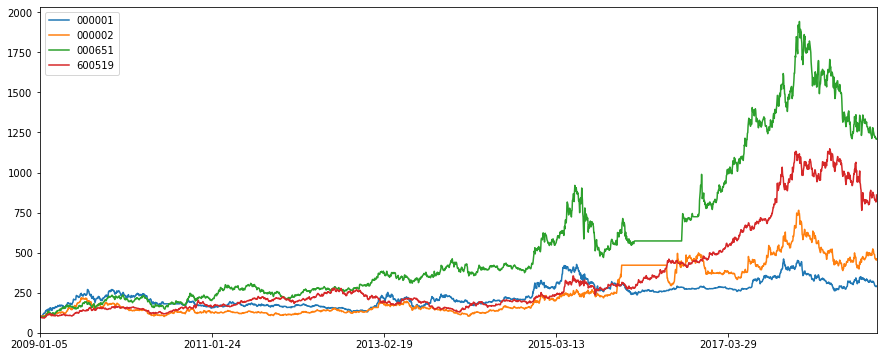

In [18]:
normalize_price.plot(figsize=(15, 6))

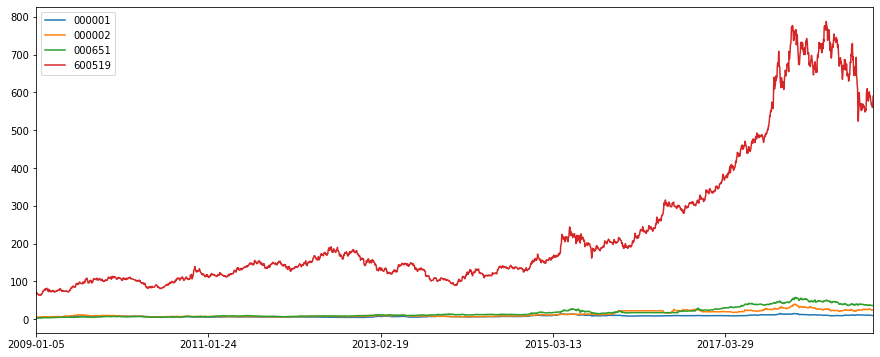

In [19]:
# 没有标准化的数据绘图, 无法比较
price.plot(figsize=(15, 6))

In [20]:
# 计算组合简单收益率
returns = price / price.shift(1) - 1
returns.head()

,000001,000002,000651,600519
2009-01-05,NaN,NaN,NaN,NaN
2009-01-06,0.060738,0.029934,-0.029113,0.003046
2009-01-07,-0.030091,-0.005813,-0.011855,-0.017654
2009-01-08,-0.039157,0.005847,-0.006351,0.016285
2009-01-09,0.026019,-0.001500,0.022017,-0.011425


In [33]:
# 赋予股票在组合的权重
weights = np.array([[0.25, 0.25, 0.25, 0.25], [0.1, 0.1, 0.5, 0.3]])

In [34]:
# 计算组合平均收益率
annual_returns = returns.mean() * 250
annual_returns

000001    0.170181
000002    0.229753
000651    0.324730
600519    0.269651
dtype: float64

In [35]:
# 用向量的方式计算组合的加权平均收益率
np.dot(weights, annual_returns)

array([0.24857887, 0.28325381])